# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Behzad Yousefipour
2.   Student Number: 401300033


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("data01.csv") 


# implement the split part
# name them: x_train, x_test, y_train, y_test

# Turn pandas dataframe to numpy array type
dataset = dataset.to_numpy()

# Splitting data into train and test part. 80% for train and 20% for test
train = dataset[:int(len(dataset) * 0.8)]
test = dataset[int(len(dataset) * 0.8):]


x_train = train[: , 1]
y_train = train[: , -1]

x_test = test[: , 1]
y_test = test[: , -1]

print("Train: ", x_train.shape ,y_train.shape)
print("Test: " ,x_test.shape ,y_test.shape)

Train:  (400,) (400,)
Test:  (100,) (100,)


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

A = np.vstack([x_train, np.ones(len(x_train))]).T

m = np.zeros((2,1))

m[0], m[1] = np.linalg.lstsq(A, y_train, rcond=None)[0]

In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3246776301777423
MSE test error: 0.3544951192130029


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

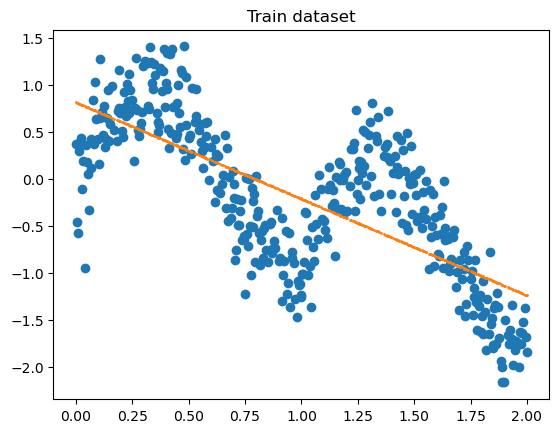

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

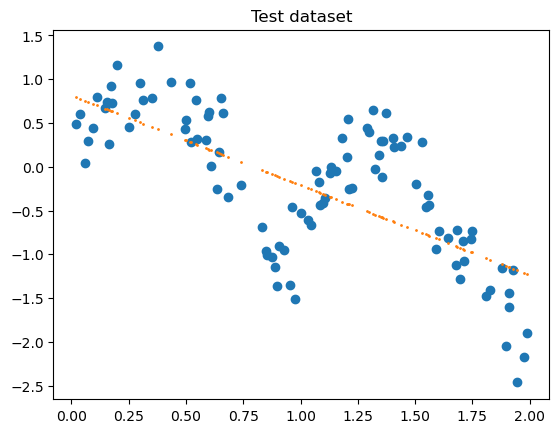

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

No. We must have at least 90% accuracy 

Its not acceptable. Because we have a non-linear relationship between input and output

No

As i said, the relationship is non-linear and we tried to train a linear regression on the training dataset, which is not appropriate for that

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

In this method, we train the regressor locally and limit our dataset. We expect it performs better than simple linear regression 

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(np.dot((xi-the_query_point), (xi-the_query_point).T)/
                         (-2 * hyperparameter * hyperparameter))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.column_stack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.linalg.inv(X.T*(W * X))*(X.T*(W * train_Y.reshape(-1,1))) 

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [9]:
hyperparameter = 0.034
predicted_test = np.zeros((len(x_test),1))
n = 0

for query in x_test:
  predicted_test[n] = predict(x_train, y_train, query, hyperparameter)
  n += 1

error = mean_squared_error(y_test, predicted_test) 
print(f"MSE test error: {error}")

MSE test error: 0.09774650426045207


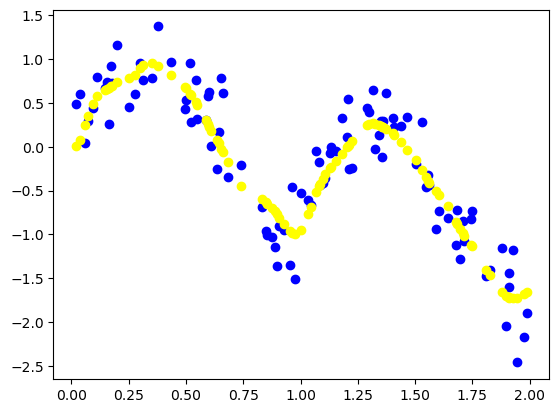

In [10]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Sure, it's better.

It is very likely that a system will behave linearly in the chosen segment when we follow its behavior in segments. As a result, it is preferable to divide a system's behavior into smaller parts and estimate the behavior of those smaller sections linearly in order to estimate a system's behavior over time.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Since the estimated value is obtained as the average of k nearest neighbors, we expect a good from K-NN regressor

### Part10:
Implementing the `KNN model`.

In [11]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        S = x1-x2
        distance = (np.sum(S*S))**0.5 # Euclidean distance
        return distance
    

    
    def return_nn_ids(self, x):
        indices = np.zeros((self.k,1))
        Dis = np.zeros((len(self.X),1))
        for i in range(0,len(self.X)):            
            Dis[i] = self.distance(x,self.X[i])

        for i in range(0,self.k):
            mymin = np.min(Dis)
            min_positions = [i for i, x in enumerate(Dis) if x == mymin]
            indices[i] = min(min_positions)
            Dis[min_positions] = 10
               
        return indices
    
    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        min1 = np.zeros((self.k,1))
        n = 0
        for j in neareest_indices:
            min1[n] = self.Y[j.astype(int)]
            n += 1
        predicted_y = np.mean(min1)

        return predicted_y

In [12]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test, predicted_y)
    return error, predicted_y

In [13]:
k = 7
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.094065991047033


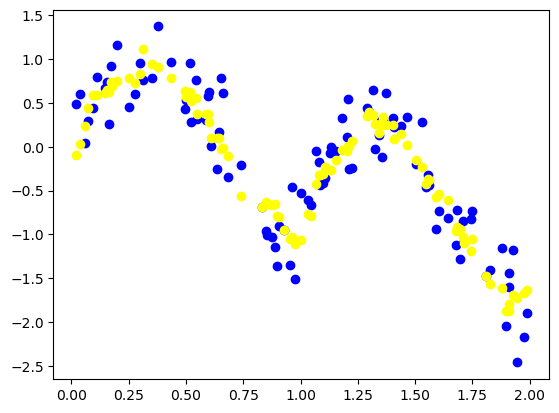

In [14]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes, it performed well. We acheived a lower error with the K-NN regressor!